# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

# All imports

The basic libraries, you may import more if there are present on the server's environment

In [2]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci
import scipy.optimize

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Opening the MC and data frames

In [92]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

In [93]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# MicroBooNE data
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849
13,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868
14,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868
16,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455
19,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041
37,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233


In [94]:
# Monte Carlo Simulation data
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weight
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.000002
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.000002
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.158957
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.192390
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.192390
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.986006
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.158957
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.158957
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.158957
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.194167


# Machine Learning for Particle Classification

First, lets take a sub sample of our Monte Carlo data.

In [6]:
# Reducing the amount of data
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14415


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent,weight
0,67.522676,80.688957,0.082586,21,0.545332,214.323059,-90.976707,127.21846,0.950058,0.87176,234.368271,-70.271591,202.314896,202.292038,-70.346748,234.409317,0.639538,0,0.158957
1,0.936867,168.970306,0.936867,7,0.029911,318.501892,72.818153,188.840134,0.999994,0.965595,313.64093,-88.792961,142.072006,142.074356,-89.265144,312.809937,0.565903,0,0.257732
2,174.962113,7.634073,35.132626,21,0.997913,394.796417,64.993286,127.123337,0.012327,0.564884,387.64978,66.055946,129.347427,122.724052,53.004150,355.711761,1.033727,1,0.158957
3,118.018829,394.541504,0.164275,21,0.865635,742.479492,-108.217155,46.378998,1.0,0.987802,365.404175,-84.348701,155.701691,155.640701,-84.214302,365.306091,0.998467,0,0.000319
4,152.295930,93.252655,0.072568,21,0.182485,572.439392,57.671398,130.162842,0.993355,0.945985,636.254761,29.510704,68.842232,68.890533,29.542234,636.212646,0.627341,0,0.203687
5,46.852252,227.730515,0.159625,21,0.917735,389.015686,-75.169395,173.313492,1.0,0.981957,173.03363,-58.944889,127.274811,127.257614,-59.100105,172.984436,0.627842,0,0.158957
6,0.131866,86.907776,0.335794,21,0.059971,810.34906,-16.717112,160.725388,0.968761,0.904237,776.068848,47.698727,207.260696,207.111588,47.400681,776.012268,0.328263,0,0.192889
7,121.733000,6.12033,0.46163,21,0.074088,849.783691,85.077187,167.731293,0.814584,-0.195614,853.909912,89.273552,166.173172,166.170837,88.995071,853.536560,0.463114,1,0.833773
8,252.661431,713.89563,1.397288,21,0.999850,839.100586,-102.265709,17.34873,1.0,0.991296,170.450684,14.51117,61.177662,61.350967,13.145391,170.285156,1.833163,0,0.027563
9,67.419880,17.201736,0.430348,21,0.999631,799.151428,26.187206,153.098465,0.840868,0.049151,793.024536,38.455708,142.888351,143.090500,38.121284,792.827576,1.137904,1,0.158957


### Visualisation
Lets visualise some of the variables using *seaborn*.

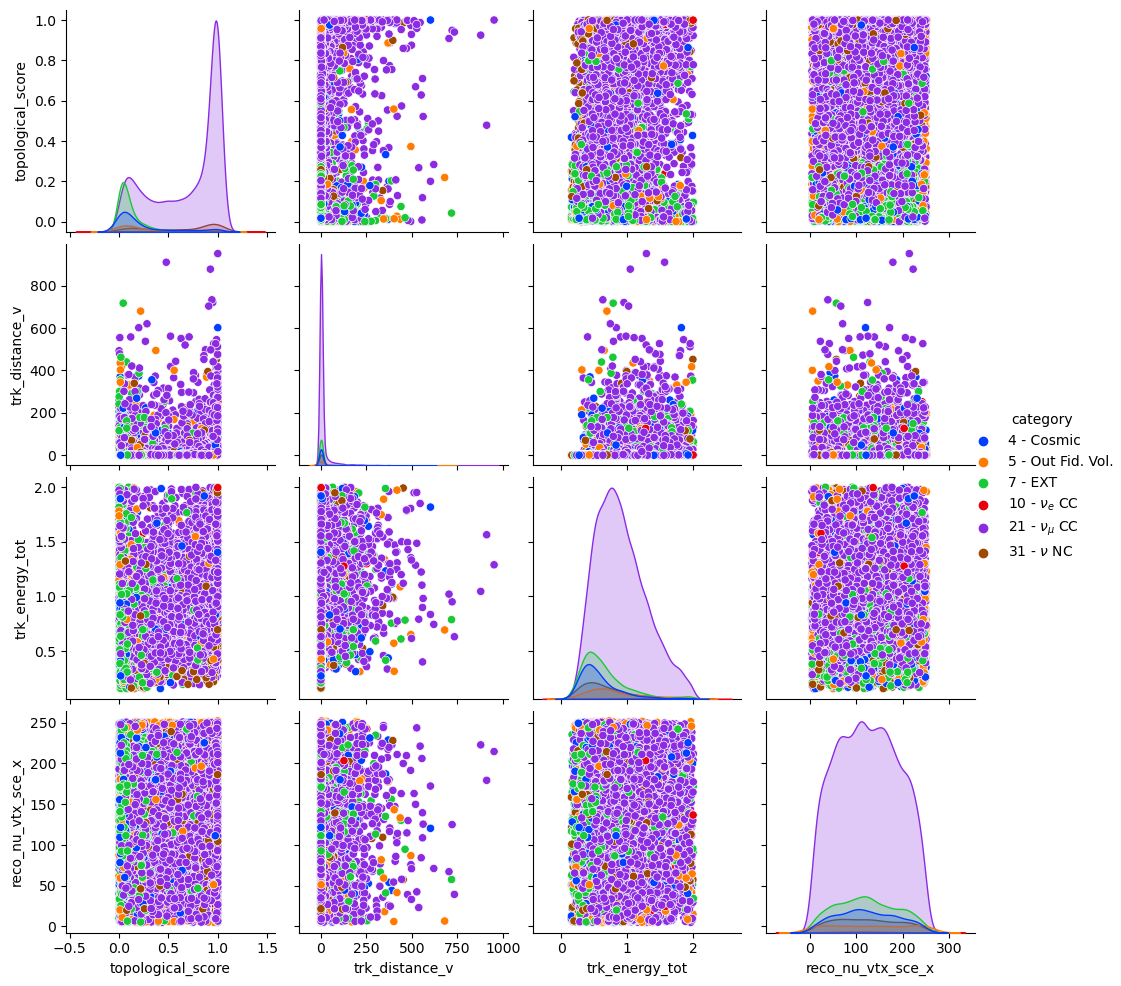

In [95]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

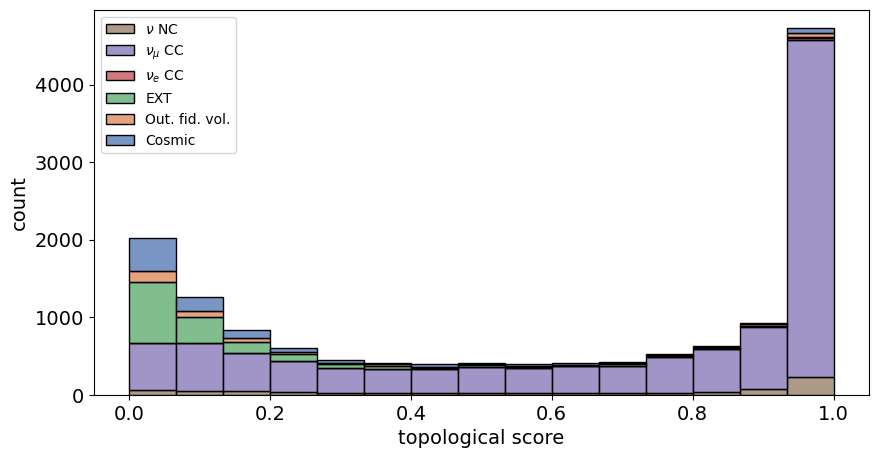

In [122]:
### IGNORE, ONLY HERE FOR POSTERITY
##plt.figure(figsize=(10,5))
##labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"]
##sns.histplot(data=MC_EXT_VIS, x = 'topological_score', hue='category', multiple='stack', palette = 'deep')
##plt.legend(loc='upper left', labels=labels)
##plt.xlabel("topological score" ,fontsize=14)
##plt.xticks(fontsize=14)
##plt.ylabel("count" ,fontsize=14)
##plt.yticks(fontsize=14)
##plt.show()

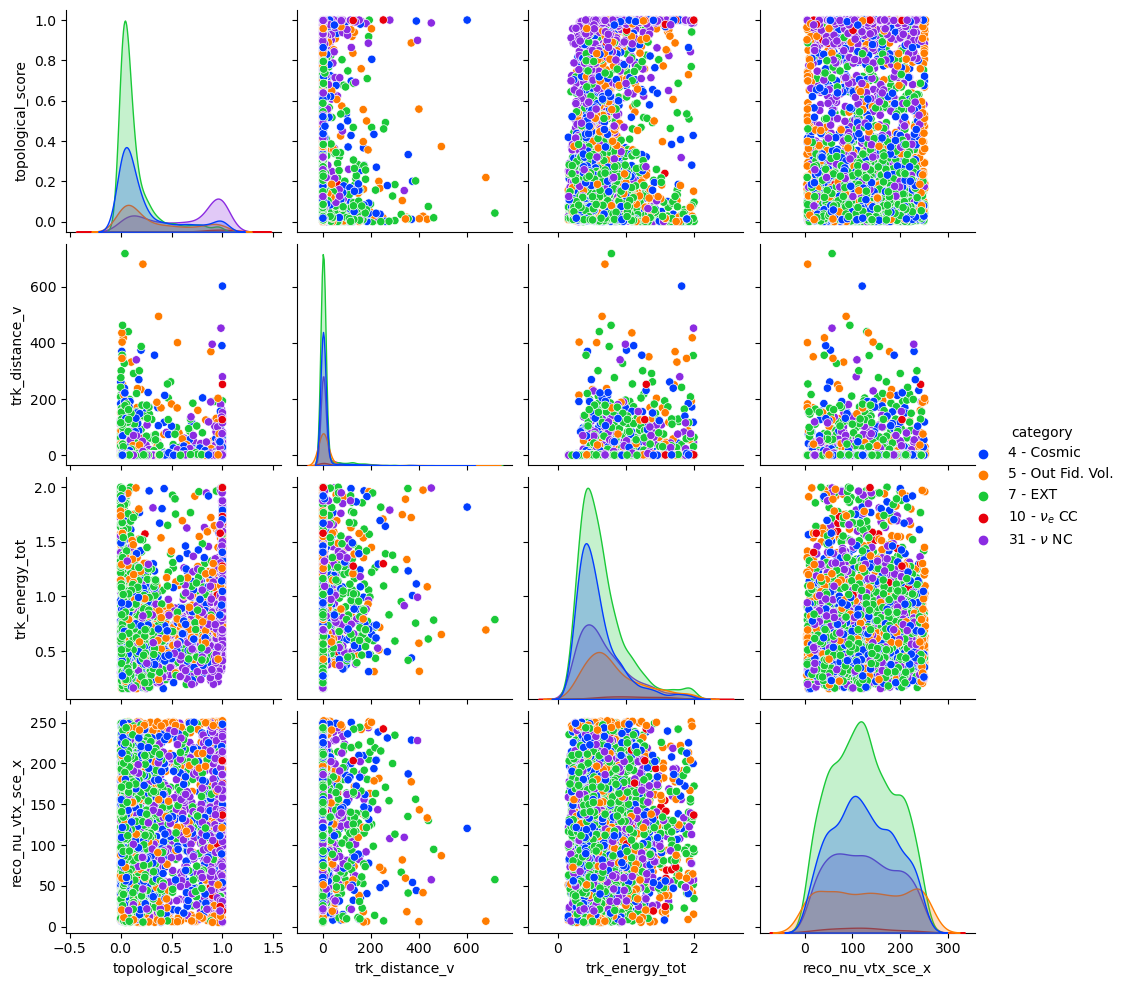

In [8]:
##### THIS FRAME WILL BE LEFT TO THE USER TO MODIFY, REMOVE THE SOUTION BELOW
# Remove signal from your data frame to allow for better visualisation of background
MC_EXT_VIS_BACK = MC_EXT_VIS.copy(deep = True)
MC_EXT_VIS_BACK = MC_EXT_VIS_BACK.drop(MC_EXT_VIS_BACK[MC_EXT_VIS_BACK.category == 21].index)

# Plot
fig = sns.pairplot(MC_EXT_VIS_BACK[variable_list], hue = 'category', palette = 'bright')

# List of categories in text
ptype_no_mu = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype_no_mu):
   t.set_text(str(t.get_text()) + " - " + str(l))

### RandomForest application
Here we shall modify the shape of our data to allow for its usage in a Decision Tree, then apply the *RandomForest* method.

In [75]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))
MC_EXT_ML = MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 21].index)
MC_EXT_ML = MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 10].index)
print(len(MC_EXT_ML))

# Setting variables
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Displaying shape, should be (N, 16) (N) where is number of samples.
print(X.shape, y.shape)
      
# Then split the data up into a "training set" and "test set" using train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70/30 training/test split

print(x_train.shape, x_test.shape)

31933
(31933, 16) (31933,)
(25546, 16) (6387, 16)


Now we can train a random forest with this data. Lets make it rather simple.

In [76]:
# Fit randomforest to our training data
rf = RandomForestClassifier(n_estimators=1000, criterion = 'gini', max_depth=8, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

In [82]:
# Test accuracy
y_pred = rf.predict(x_train)
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.6693807249667267
Accuracy on testing dataset: 0.6392672616251761


Now plot a confusion matrix to see how well it predicts your data, and where it gets confused.

/home/casper/anaconda3/envs/uboone_lab/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


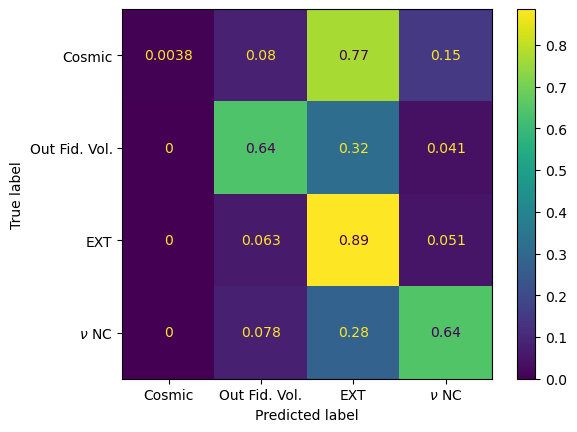

In [78]:
# Plot confusion matrix

ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]
matrix = plot_confusion_matrix(rf, x_test, y_test, normalize='true', display_labels=ptype_no_mu_e)
plt.show()

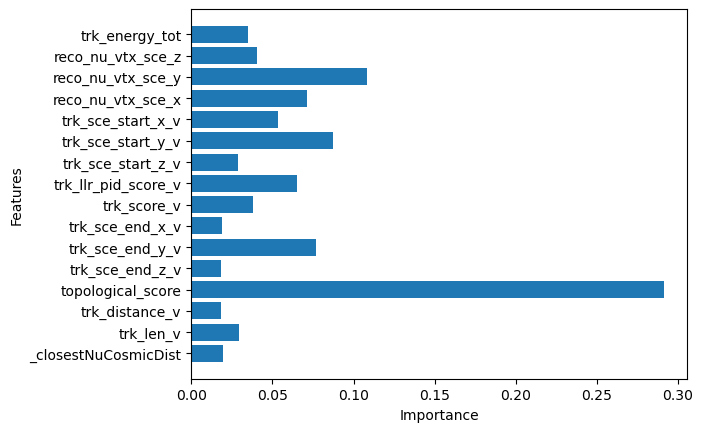

In [79]:
# PLot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



Run on data

In [5]:
data_ML = data.copy(deep = True)
data_ML = data_ML.sample(int(len(MC_EXT)/10))
data_ML.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent
133645,117.482356,339.54599,121.459587,0,0.332676,599.046387,-2.917283,128.044937,1.0,0.983885,285.741882,-115.082664,142.598419,183.748749,-114.810921,399.730347,10000.180147,0
348357,115.602484,6.365733,62.706158,0,0.414261,700.156799,-1.576385,2.142968,0.009659,0.548573,699.493896,-6.552085,6.035236,20.722616,-52.514114,739.460144,0.436752,1
84508,351.514616,240.797806,0.317269,0,0.883759,205.748337,-66.425385,150.949402,1.0,0.974096,0.494627,-10.263481,40.096611,39.946884,-10.323139,0.221321,9999.820539,0
298085,110.186003,33.081764,2.300345,0,0.975753,685.193176,-15.878481,159.508789,0.379496,0.828873,655.912964,-1.967822,164.986786,164.910614,-0.825130,653.911011,9999.790255,1
76222,196.865513,30.154976,93.503548,0,0.951607,596.957703,55.86639,243.769485,0.016621,0.834632,573.2005,71.808029,243.532257,207.300674,99.352654,490.901947,10000.320482,0
224561,200.524741,118.968582,3.15705,0,0.076287,71.188217,115.30687,7.385352,0.999341,0.909816,106.722618,4.14643,27.461836,27.527393,5.704873,103.990669,9999.654369,0
253823,131.760495,441.979248,0.547022,0,0.759052,430.196289,-115.428757,185.287781,1.0,0.987438,0.230348,-26.330381,209.502716,209.511200,-25.775625,0.319718,10000.276298,0
321362,24.684396,286.76889,0.151175,0,0.153431,866.126221,-61.727974,144.105545,1.0,0.980471,602.090576,-112.718697,240.293518,240.347885,-112.741295,601.950562,10000.135417,0
106868,116.030336,42.748917,0.782165,0,0.008672,868.850769,76.809937,166.577896,0.466026,0.816037,850.973633,114.124352,175.002441,175.221237,114.862137,850.757446,9999.270613,0
316622,71.618652,475.02478,0.521969,0,0.974931,1037.195801,-36.818352,131.020401,1.0,0.98964,584.23645,97.079002,95.00135,95.088722,96.597382,584.288635,10000.531682,0


## KERAS SECTION - NOT FOR STUDENTS, JUST TO USE AS AN EXAMPLE, COMMENT THE CODE IF YOU WISH TO IGNORE IT.

In [66]:
import tensorflow as tf

# turn off multithreading
from tensorflow.python.keras import backend as K
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=config)
K.set_session(sess)

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping

In [84]:
# import scaling stufff
from sklearn.preprocessing import StandardScaler

MC_EXT_ML_keras = MC_EXT.copy(deep = True)
MC_EXT_ML_keras = MC_EXT_ML_keras.drop(MC_EXT_ML_keras[MC_EXT_ML_keras.category == 21].index)
MC_EXT_ML_keras = MC_EXT_ML_keras.drop(MC_EXT_ML_keras[MC_EXT_ML_keras.category == 10].index)

# In here, set categories to 0,1,2,3
# 0 -> 4 (cosmic)
# 1 -> 5 (Out Fid. Vol.)
# 2 -> 7 (EXT)
# 3 -> 31 (mu CC)
MC_EXT_ML_keras.loc[MC_EXT_ML_keras['category'] == 4, 'category'] = 0
MC_EXT_ML_keras.loc[MC_EXT_ML_keras['category'] == 5, 'category'] = 1
MC_EXT_ML_keras.loc[MC_EXT_ML_keras['category'] == 7, 'category'] = 2
MC_EXT_ML_keras.loc[MC_EXT_ML_keras['category'] == 31, 'category'] = 3

MC_EXT_ML_keras.head(10)


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent,weight
301582,110.270408,11.179025,8.746837,5,0.976568,369.140442,-105.726913,101.925606,0.394812,0.655363,371.203094,-115.373016,96.912079,90.183731,-109.600105,372.425201,9999.581808,2.0,0.158957
421888,268.115397,300.861603,0.429686,7,0.024670,234.45726,-105.215134,132.410065,1.0,0.979803,0.222075,75.833328,88.283096,88.215576,76.046638,-0.143562,9999.961663,0,0.257732
81160,63.131080,198.475464,63.131081,4,0.000000,806.575195,122.464821,198.777603,1.0,0.969971,739.688232,-63.47855,195.496658,195.858780,-123.726036,706.538879,10000.009920,0,1.005639
314115,100.532827,19.458817,1.190966,5,0.510985,585.457214,-23.384789,240.085144,0.739889,0.713337,597.280762,-19.563705,254.376999,254.258194,-18.283209,597.104431,9999.237821,0,0.158957
364151,88.278251,33.546455,0.090025,5,0.024867,796.903381,-73.887894,245.781738,0.924621,-0.851489,780.888672,-101.874893,254.822464,254.851791,-101.957848,780.939148,9999.234760,0,0.186314
305433,0.705448,119.388611,0.705448,31,0.139161,230.594894,117.375381,34.681957,0.993874,0.933184,216.869431,1.778191,8.617951,8.565424,1.969969,216.192963,9999.874784,0,0.158957
264589,142.316505,17.696087,40.63644,4,0.057562,939.8573,-52.852352,79.654922,0.018512,0.44721,939.819092,-70.031303,80.312859,97.399132,-108.335228,937.533264,9999.421273,0,0.158957
120446,124.048416,19.902637,36.631748,5,0.274369,47.8853,-97.893684,67.918282,0.009313,0.68132,37.799866,-90.232178,53.252026,31.009872,-77.541992,11.110301,9999.426005,1,0.158957
166137,66.316421,27.146469,11.262055,31,0.017625,588.067993,112.352219,57.979481,0.012256,0.809301,586.703186,107.736626,83.076164,93.698410,104.513603,587.277344,9999.458925,0,0.158957
545746,67.709350,94.239868,0.234451,7,0.057942,694.325195,35.976635,0.243741,0.990676,0.927233,683.783569,-39.329674,53.277626,53.457451,-39.448807,683.705688,9999.439880,0,0.257732


In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(MC_EXT_ML_keras[features])

y = np.array(MC_EXT_ML_keras['category'])


# scaled, but same shape
print(scaled_data)
print(MC_EXT_ML_keras[features].shape, scaled_data.shape)

# now split for usage
xs_train, xs_test, ys_train, ys_test = train_test_split(scaled_data, y, test_size = 0.3, random_state = 1)

[[ 0.29032743  1.22551112 -0.32571788 ...  1.27954916  0.61152635
   0.37763205]
 [-1.16653145 -0.43923023 -0.198623   ...  0.43132276 -0.77055524
   0.37746616]
 [-1.16653145 -0.86151083 -0.27889186 ...  0.43132276 -0.77055524
   0.37746616]
 ...
 [ 0.1615978   0.22815674 -0.31940125 ...  0.46183234  0.10385286
   0.37754535]
 [ 0.1615978  -0.81540081 -0.31990405 ...  0.46183234  0.10385286
   0.37754535]
 [ 0.59696934 -0.42681703  3.09562344 ...  1.2870956  -1.36969251
   0.37748382]]
(319216, 16) (319216, 16)


In [86]:
# Create Keras Model
inpt = Input(shape=(xs_train.shape[1]))
layer0 = Dense(128, activation='relu')(inpt)
drop1 = Dropout(.2)(layer0)
layer1 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(.2)(layer1)
layer2 = Dense(32, activation='relu')(drop2)
layer3 = Dense(16, activation='relu')(layer2)
output = Dense(4, activation='softmax')(layer3)

kf = Model(inputs=inpt, outputs=output, name='kerasNN')

In [87]:
# Compile using Adam optimiser
kf.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Get summary of NN
kf.summary()

Model: "kerasNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               2176      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528 

In [88]:
# callback to stop it running forever
callbacks = EarlyStopping(monitor = 'val_loss', patience = 4, min_delta = 0.001, verbose = 1)
# train network
kff = kf.fit(xs_train, ys_train, epochs = 25, batch_size = 32, validation_data = (xs_test, ys_test), callbacks = callbacks)

Epoch 1/50
6983/6983 [==============================] - 9s 1ms/step - loss: 0.9623 - accuracy: 0.6061 - val_loss: 0.9024 - val_accuracy: 0.6310
Epoch 2/50
6983/6983 [==============================] - 8s 1ms/step - loss: 0.9117 - accuracy: 0.6299 - val_loss: 0.8794 - val_accuracy: 0.6454
Epoch 3/50
6983/6983 [==============================] - 8s 1ms/step - loss: 0.8898 - accuracy: 0.6406 - val_loss: 0.8635 - val_accuracy: 0.6534
Epoch 4/50
6983/6983 [==============================] - 9s 1ms/step - loss: 0.8786 - accuracy: 0.6470 - val_loss: 0.8548 - val_accuracy: 0.6542
Epoch 5/50
6983/6983 [==============================] - 9s 1ms/step - loss: 0.8710 - accuracy: 0.6497 - val_loss: 0.8475 - val_accuracy: 0.6570
Epoch 6/50
6983/6983 [==============================] - 8s 1ms/step - loss: 0.8648 - accuracy: 0.6525 - val_loss: 0.8418 - val_accuracy: 0.6623
Epoch 7/50
6983/6983 [==============================] - 8s 1ms/step - loss: 0.8608 - accuracy: 0.6545 - val_loss: 0.8426 - val_accuracy:

In [89]:
# evaluate
print("KERAS ACCURACY AND LOSS \n")

print("Test data accuracy and loss")
stest_res = kf.evaluate(xs_test, ys_test)
print("\n")

print("Training data accuracy and loss")
strain_res = kf.evaluate(xs_train, ys_train)

# SKLEARN ACCURACY AND LOSS
print("\n SK LEARN ACCURACY AND LOSS \n")
print("Accuracy on training dataset:",rf_acc_train)
print("Accuracy on testing dataset:",rf_acc_test)

KERAS ACCURACY AND LOSS 

Test data accuracy and loss
2993/2993 [==============================] - 2s 723us/step - loss: 0.8167 - accuracy: 0.6713


Training data accuracy and loss
6983/6983 [==============================] - 5s 646us/step - loss: 0.8040 - accuracy: 0.6770

 SK LEARN ACCURACY AND LOSS 

Accuracy on training dataset: 0.6693807249667267
Accuracy on testing dataset: 0.6392672616251761


In [90]:
# create confusion matrix
test_pred = kf.predict(xs_test)
y_pred1 = np.argmax(test_pred, axis=1)

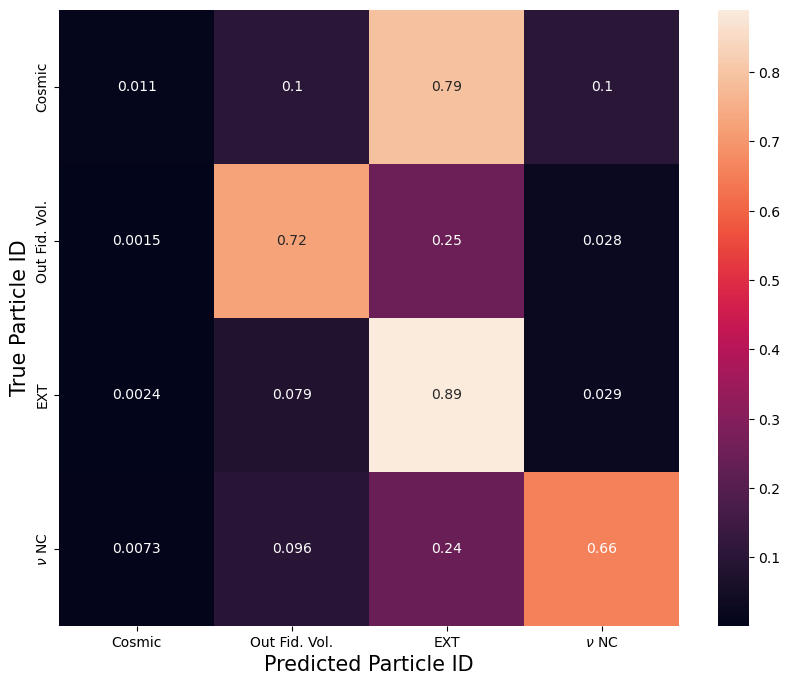

In [91]:
matrix = confusion_matrix(ys_test, y_pred1, normalize = 'true')
df_cm = pd.DataFrame(matrix, index = ptype_no_mu_e, columns = ptype_no_mu_e)
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Particle ID', fontsize = 15)
plt.ylabel('True Particle ID', fontsize = 15)
plt.show()


# This command, when ran, shows you the different inputs you can give the function

You can access this function. It is present in Neutrino_functions.py. You can create your own plotting function if you wish.

In [4]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



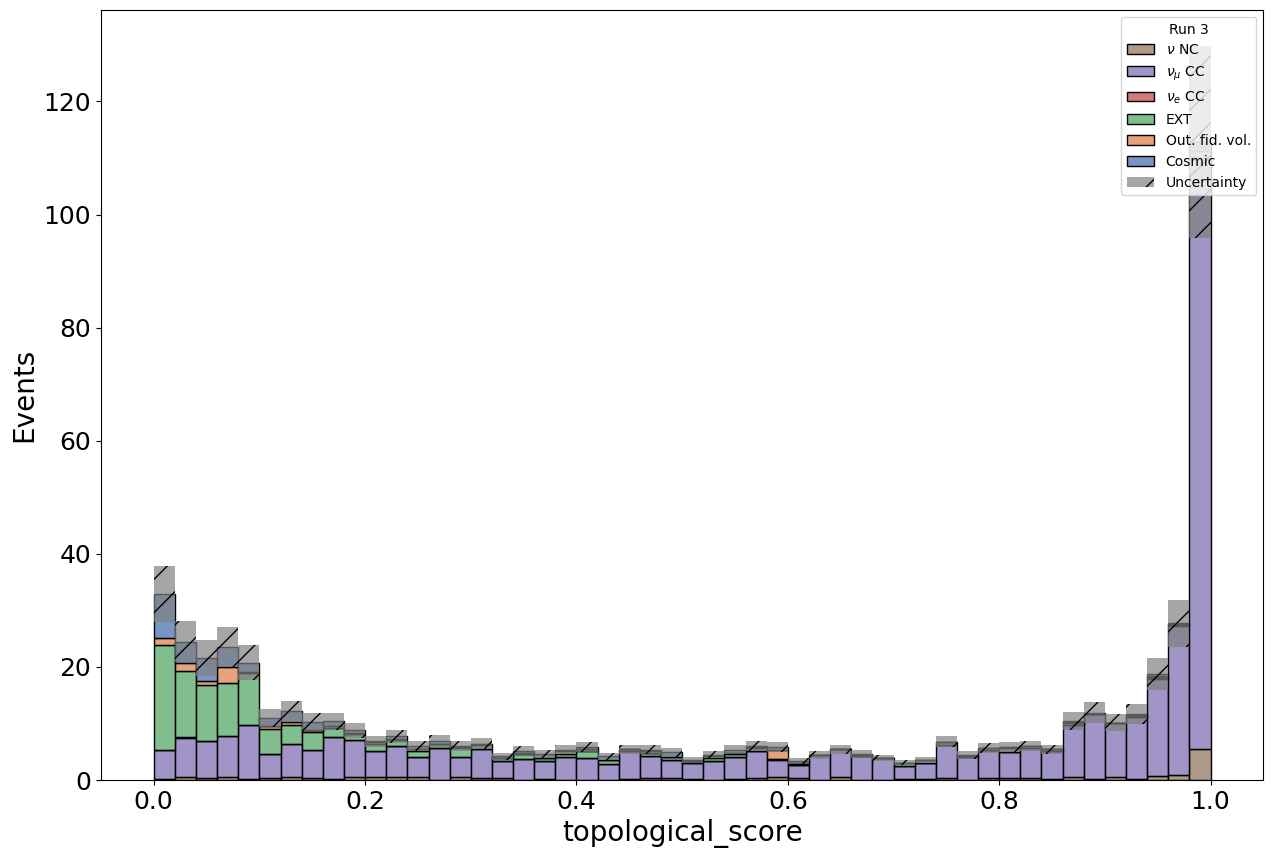

UnboundLocalError: local variable 'heights' referenced before assignment

In [ ]:
mc_dump, data_dump = Neutrino_functions.histogram_plot(MC_EXT_ML, 'topological_score', 50, 'saved_figure_name', MC_EXT_ML['weight'],xlims=[0,1], plot_data = False, logscale = False, dataFrame = data)


# Make your selections here

Modify selection cuts. Remember to cut the same variables in both data sets.

In [5]:
def Selections(frame):
    
    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']
    trk_start_y_v = frame['trk_sce_start_y_v']
    trk_start_z_v = frame['trk_sce_start_z_v']
    trk_end_x_v = frame['trk_sce_end_x_v']
    trk_end_y_v = frame['trk_sce_end_y_v']
    trk_end_z_v = frame['trk_sce_end_z_v'] 
    reco_x = frame['reco_nu_vtx_sce_x']
    reco_y = frame['reco_nu_vtx_sce_y']
    reco_z = frame['reco_nu_vtx_sce_z']
    topological = frame['topological_score']
    trk_score_v = frame['trk_score_v']
    trk_dis_v = frame['trk_distance_v']
    trk_len_v = frame['trk_len_v']
    trk_energy_tot = frame['trk_energy_tot']
    
    # adding in nucosmic distance
    cosmic_distance = frame['_closestNuCosmicDist']
    
    cat = frame['category']
    
    # List of [signal entries , purity , label]. Can be appended each selection cut
    #event = []
    #event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])
    
    
    # select the conditions you want to apply 
    # The example here removes tracks of lengths that are greater than 1000 cm
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # limit the fiducial volume (only need to apply this once, maybe use hard limits on one of the spatial coordinates)
    #selection = selection & (trk_start_x_v < np.max(trk_start_x_v)*0.99) & (trk_start_x_v > np.max(trk_start_x_v)*0.01)
    #selection = selection & (trk_start_y_v < np.max(trk_start_y_v)*0.99) & (trk_start_y_v > np.max(trk_start_y_v)*0.01)
    #selection = selection & (trk_start_z_v < np.max(trk_start_z_v)*0.99) & (trk_start_z_v > np.max(trk_start_z_v)*0.01)
    
    # one more cut as the above one is imperfect
    ###selection = selection & (trk_end_x_v < 250) & (trk_end_x_v > 10)
    ###selection = selection & (trk_start_x_v < 250) & (trk_start_x_v > 10)
    
    # remove the massive energy spike thats unphysical
    selection = selection & (trk_energy_tot < 2)
    
    # remove the 0 component from nu cosmic distance
    selection = selection & (cosmic_distance > 10)
    
    # take out topological score below a certain value (0.4)
    selection = selection & (topological > 0.15)
    
    # remove trk_len_v values below 200
    #selection = selection & (trk_len_v > 200)
    
    
    ### OLES SELECTION CRITERIA
    ###selection = selection & (trk_end_z_v > 10) & (trk_start_x_v > 20)&(trk_start_x_v<240) & (trk_start_y_v > -100)&(trk_start_y_v<100) & (_closestNuCosmicDist > 20) & (trk_len_v > 30) & (trk_len_v < 1000) & (trk_end_y_v > -110) & (trk_end_y_v < 100)
    
    # separate frame from frame_selection to allow for efficiency calculations
    frame_selection = frame[selection]
    
    # quick check to see if the table has any truth data (as this code is run on the real data as well as MC data) 
    # bit of a janky solution currently but it'll do
    
    if (len(frame[cat==21]['category']) != 0):
        # before applying, calculate efficiency and purity in here (its easier!)
        efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
        purity = len(frame_selection[cat==21]['category'])/len(frame_selection)
        print("WARNING: Cutting efficiency will only be accurate across first application, after that point it will be set to 1.00.\nCutting Efficiency: {:.2f}\nCutting Purity: {:.2f}".format(efficiency, purity))

    # Apply selection on dataframe
    frame = frame_selection
    
    return frame

# Calls the selection function on the dataframes

In [6]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)
# be careful here, as you're trimming a trimmed dataset if you adjust the selections after running this file!

/tmp/ipykernel_113308/1454699776.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
/tmp/ipykernel_113308/1454699776.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purity = len(frame_selection[cat==21]['category'])/len(frame_selection)


Cutting Efficiency: 0.36
Cutting Purity: 0.85


# Plot all variables and decide on selection cuts

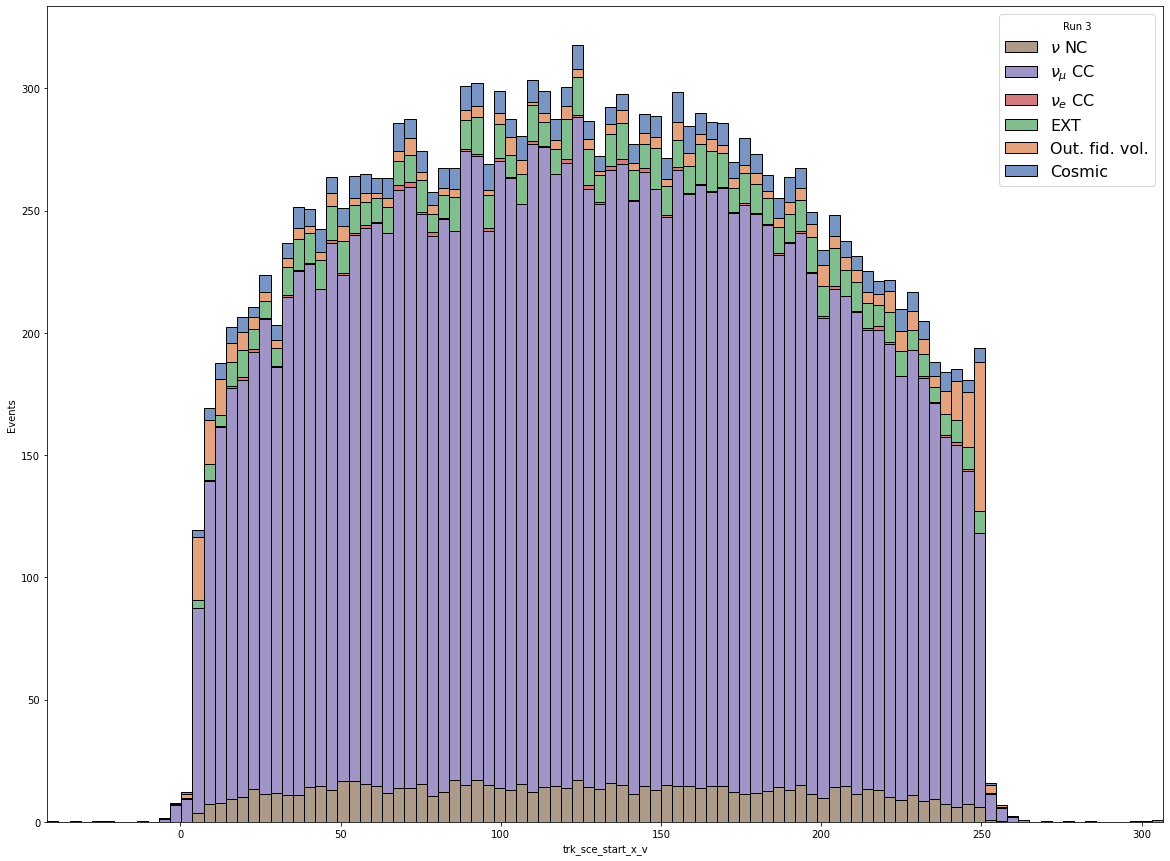

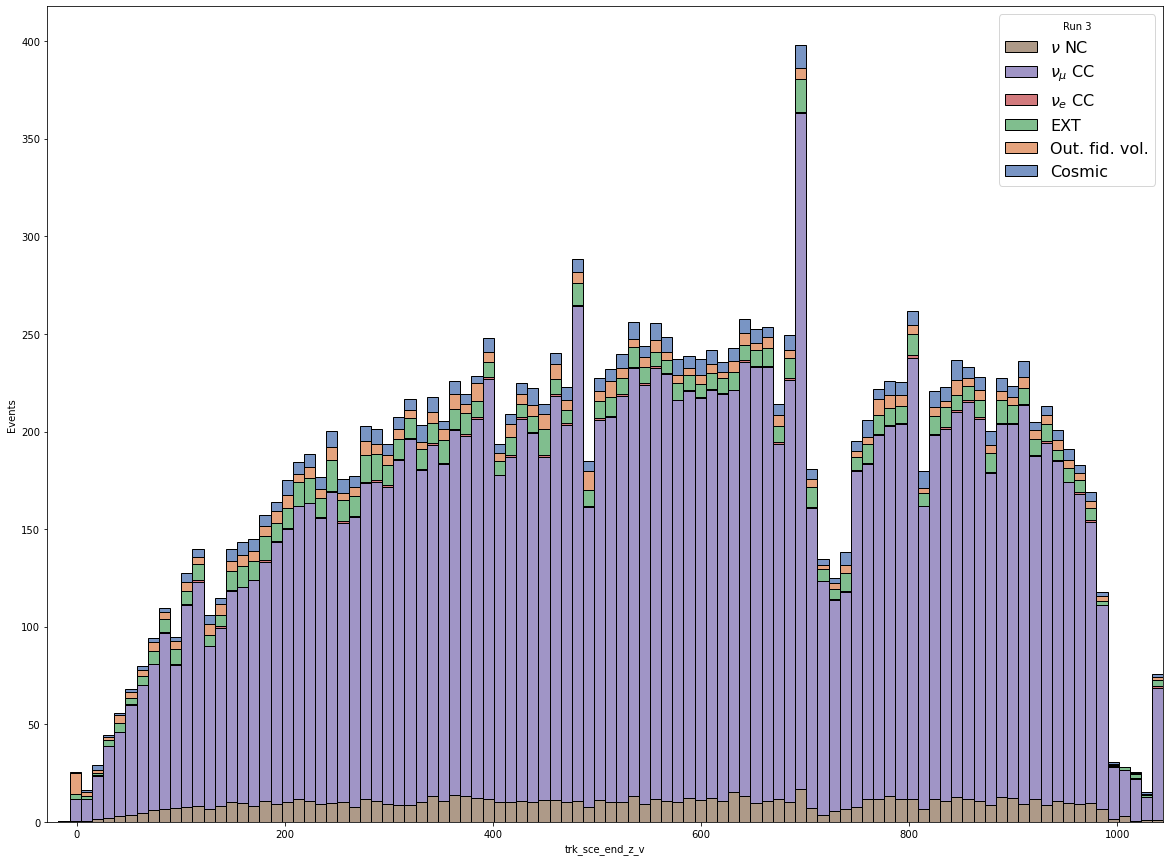

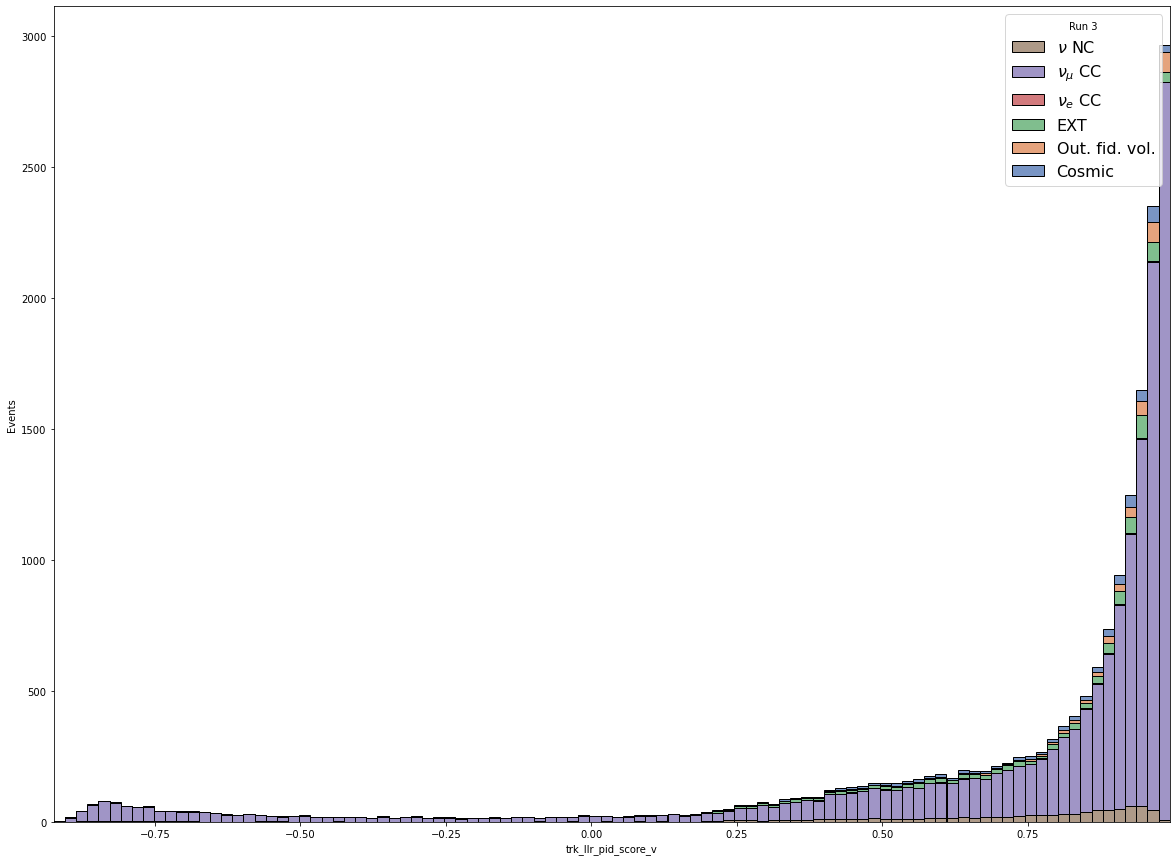

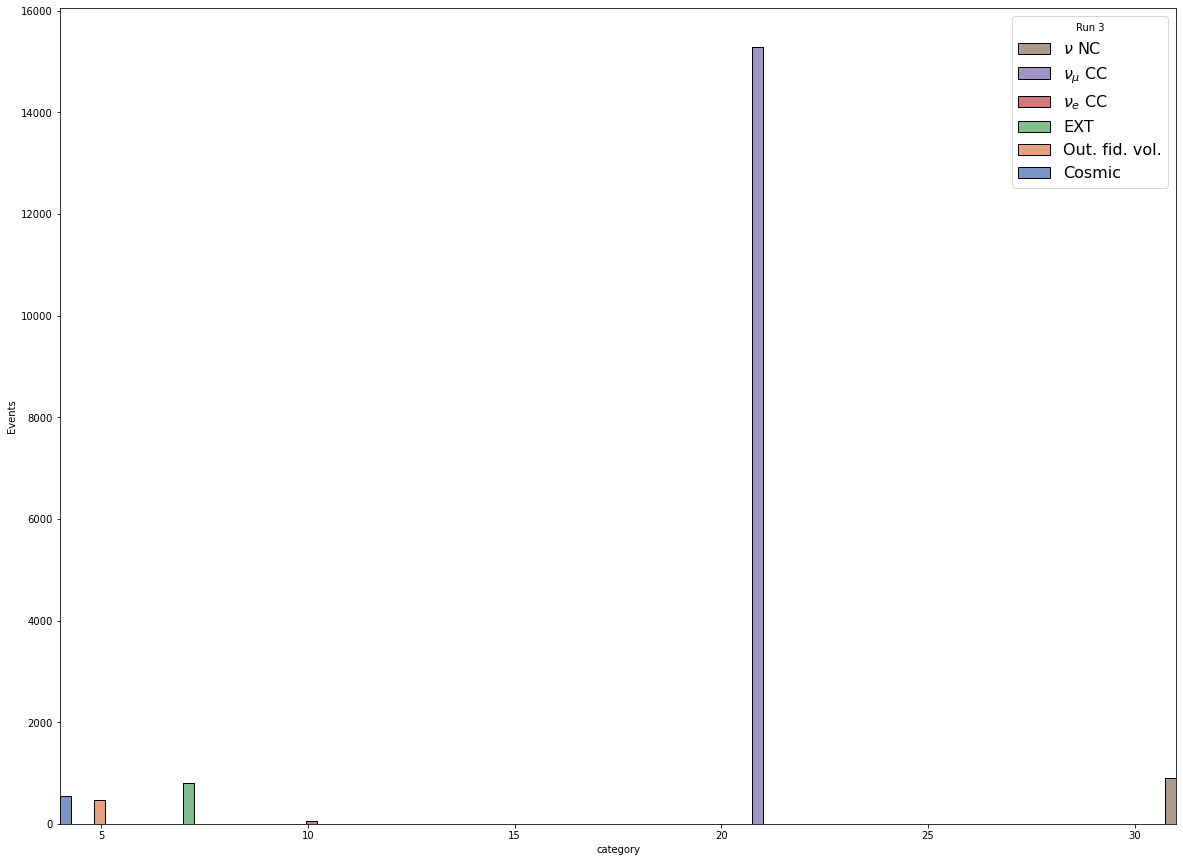

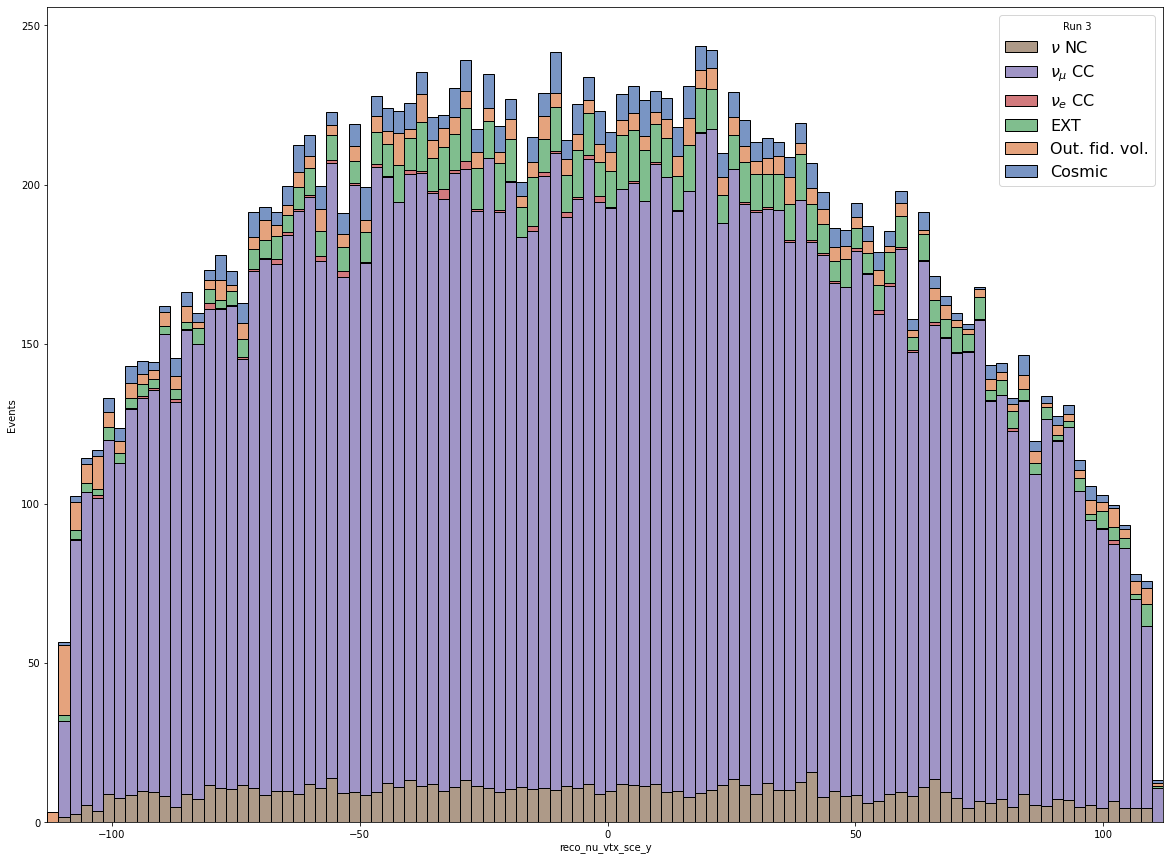

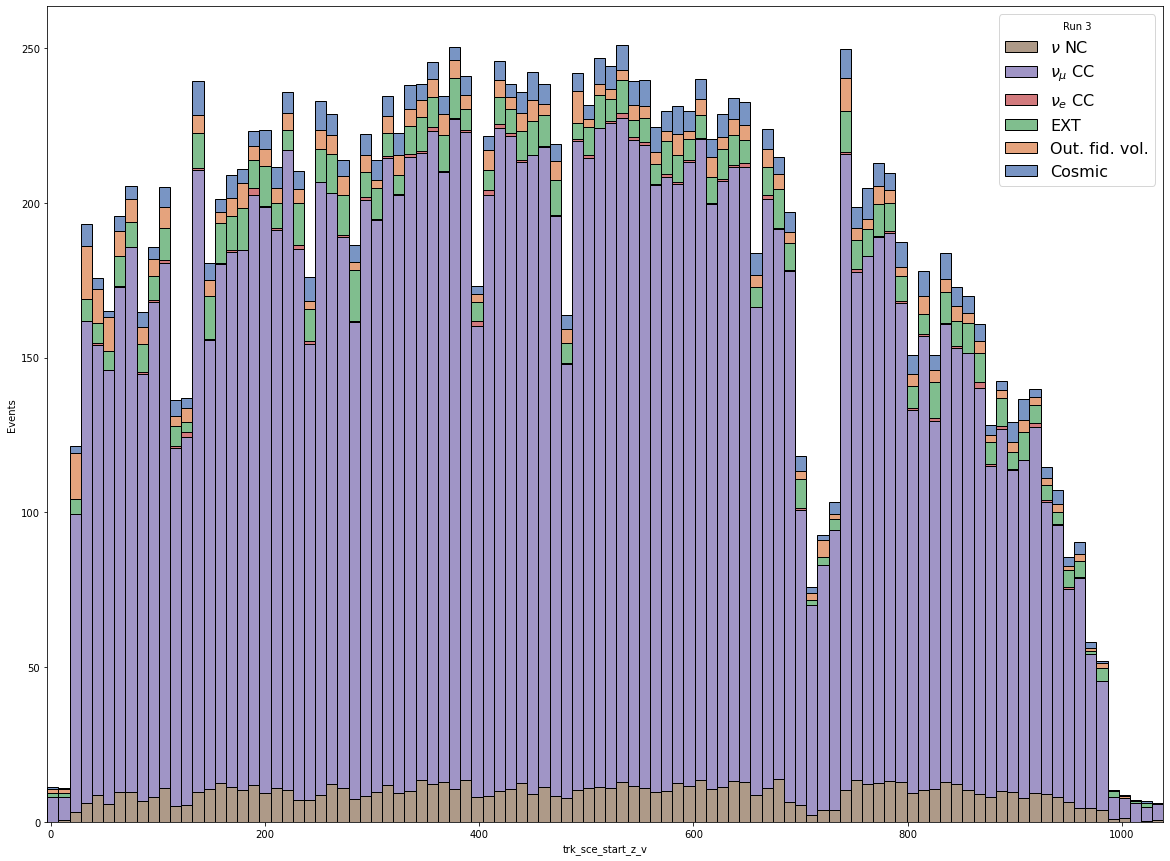

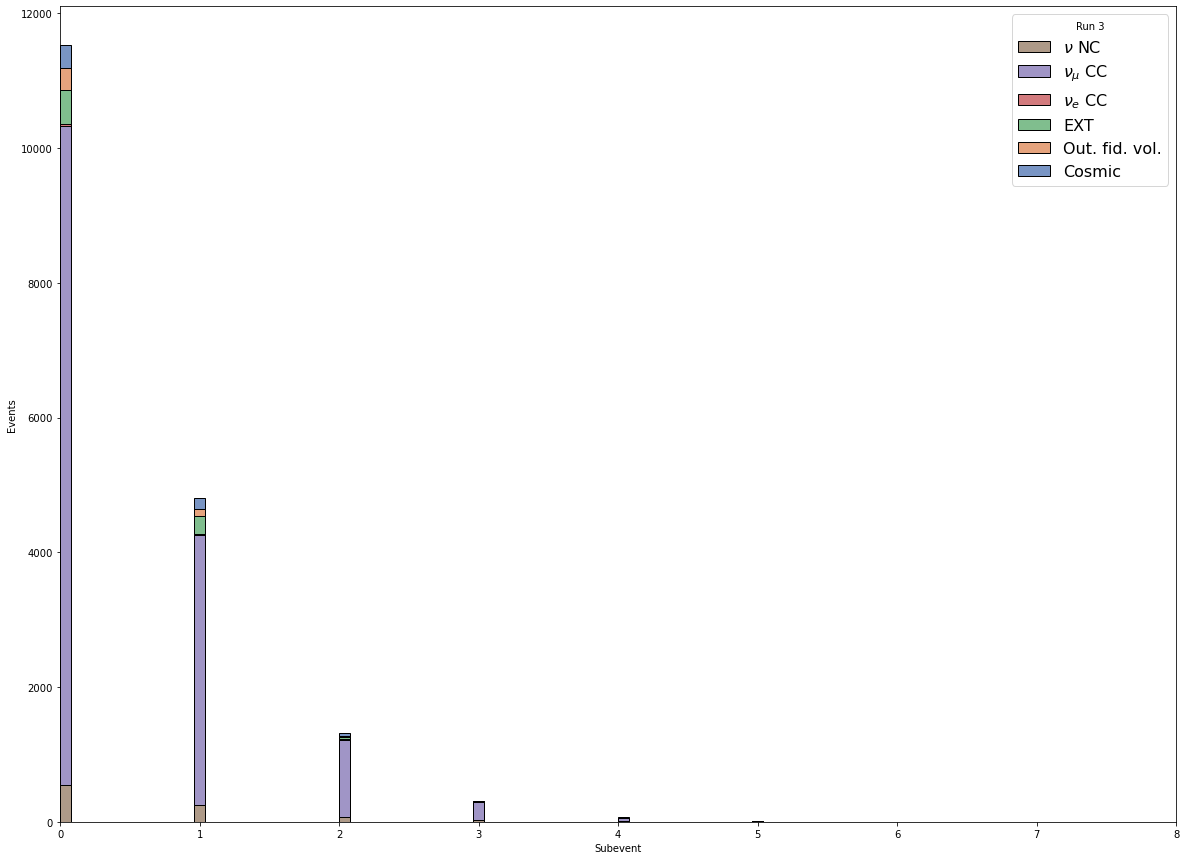

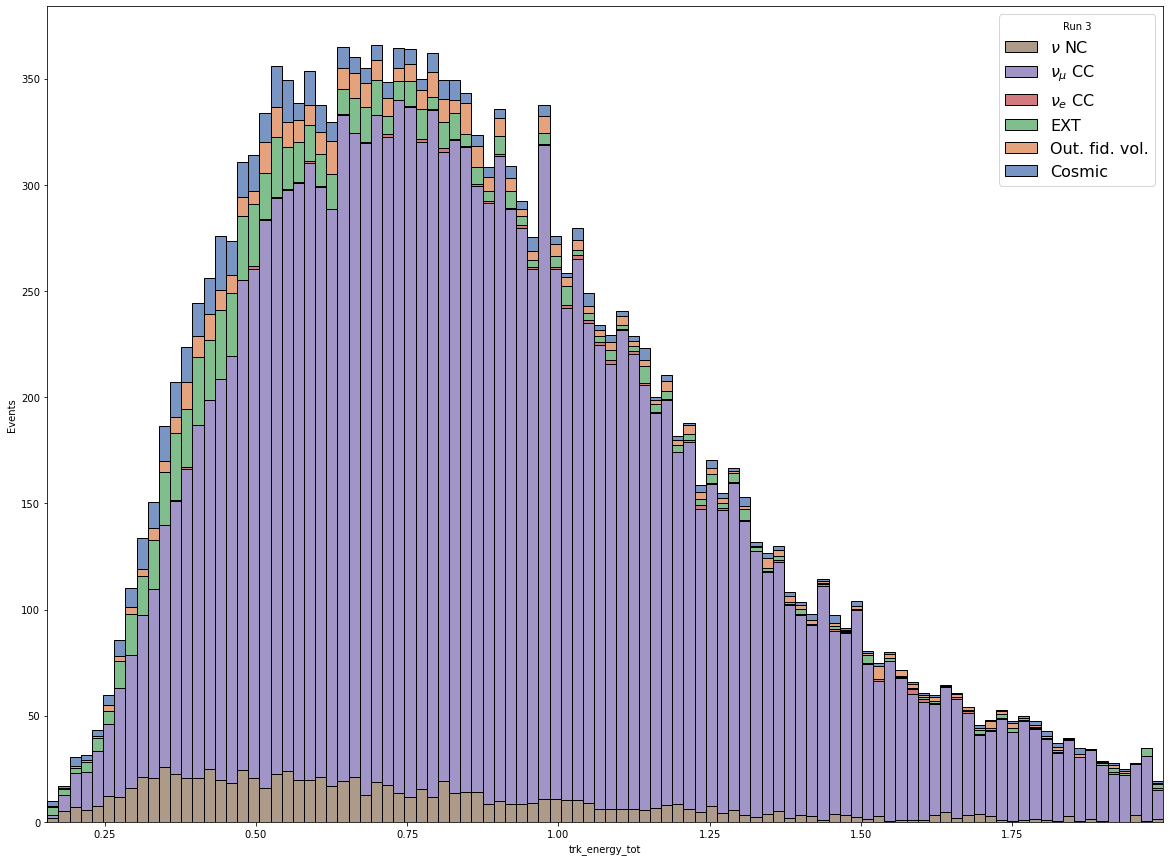

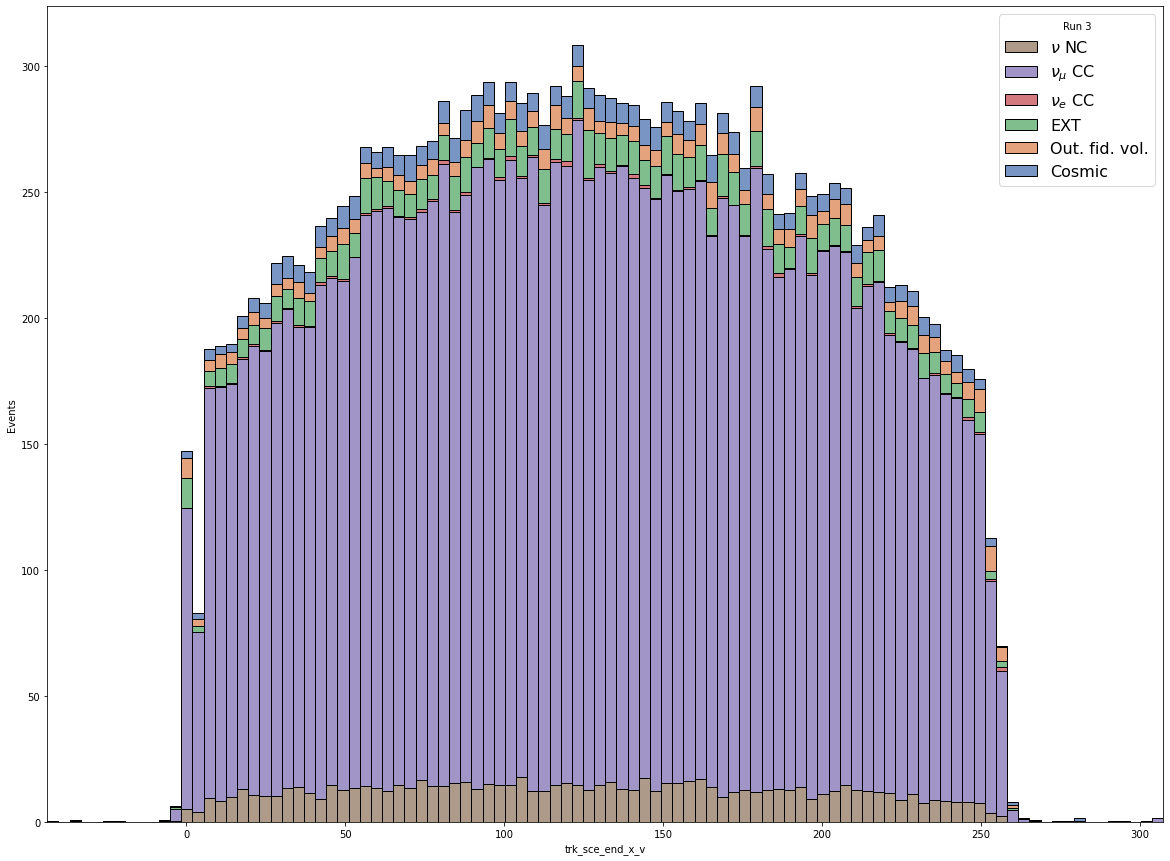

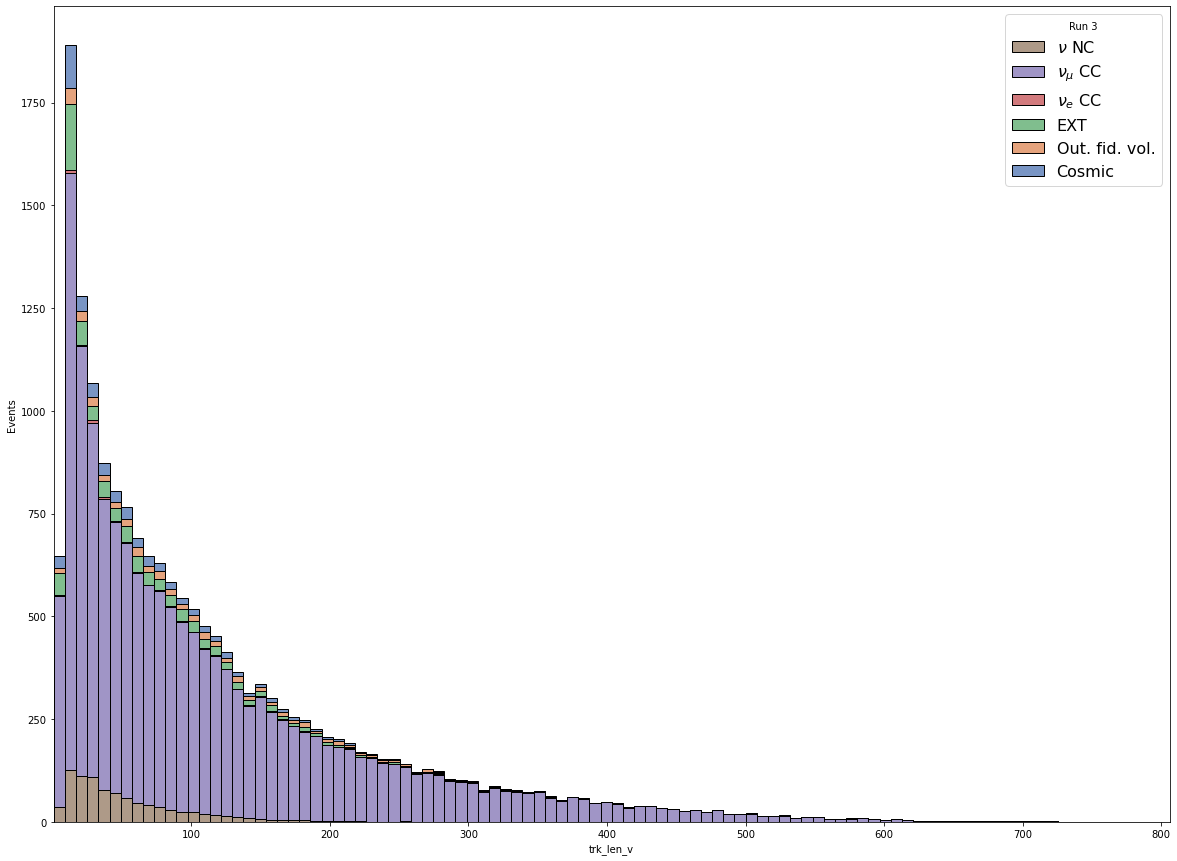

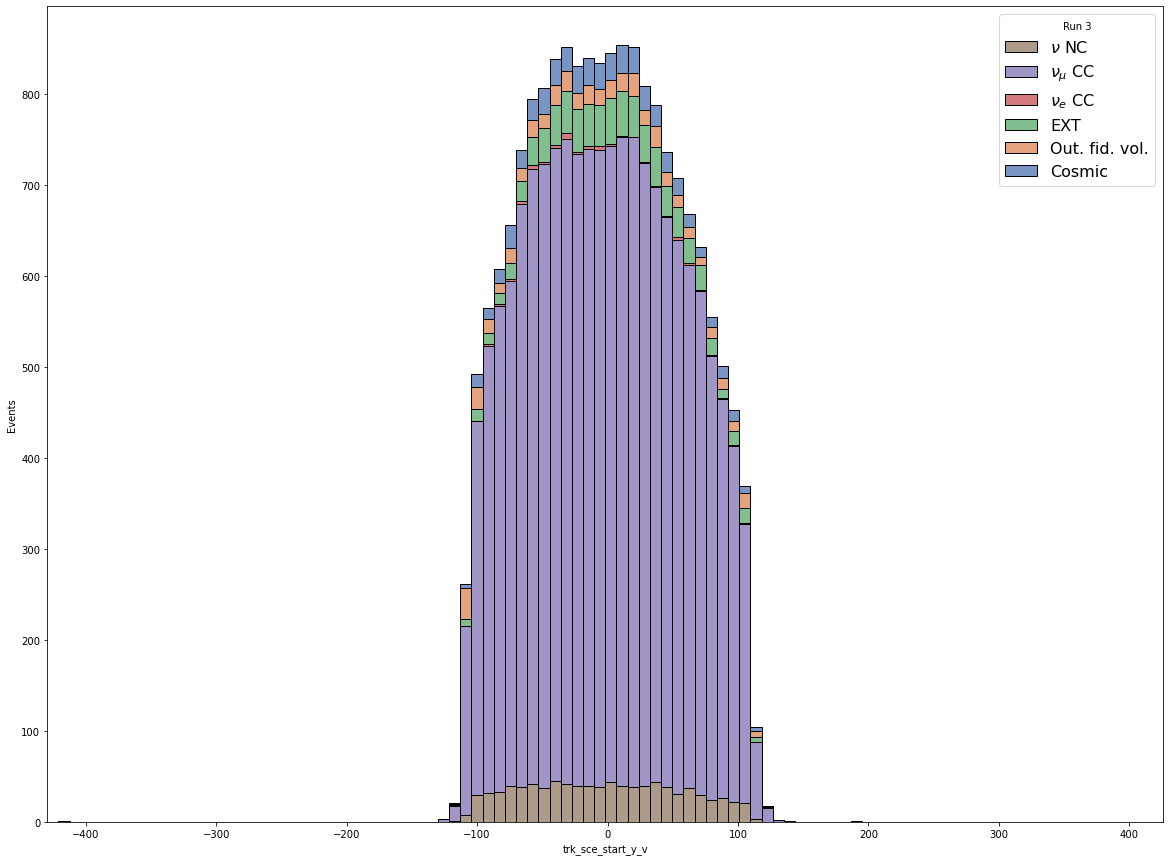

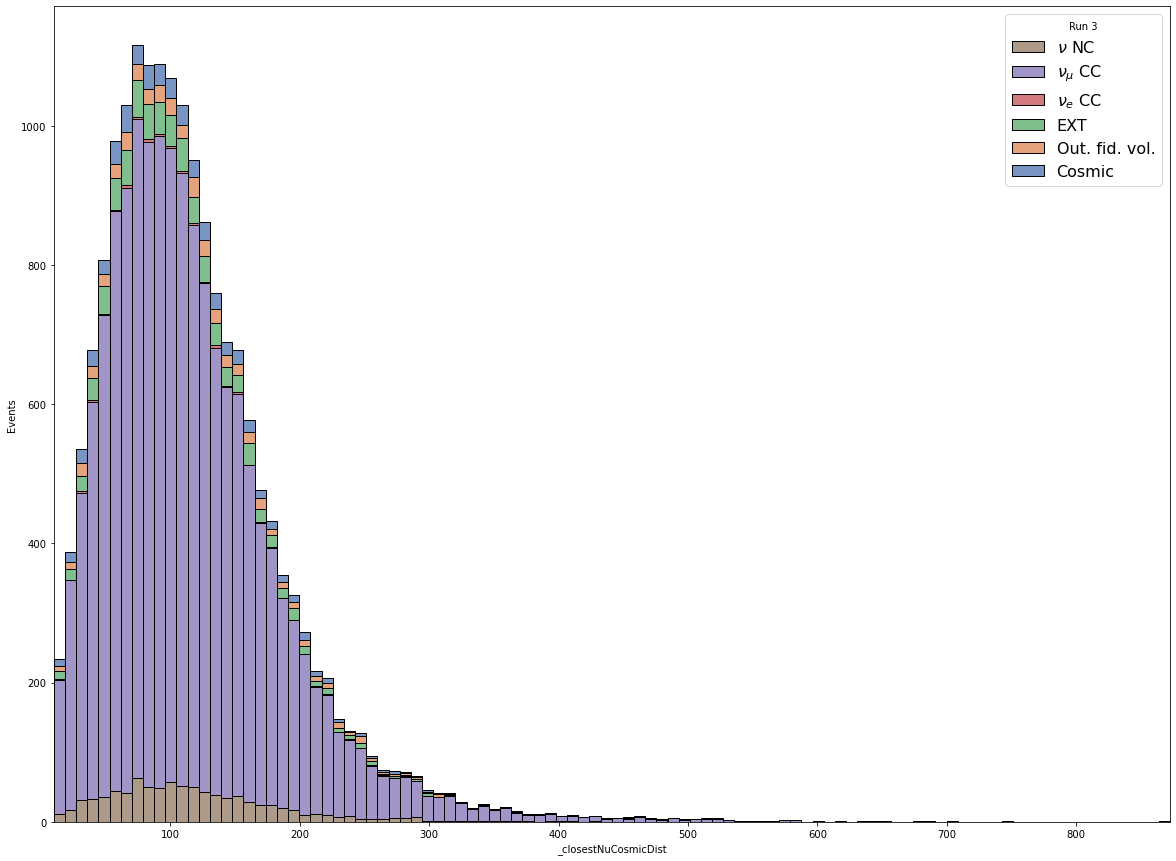

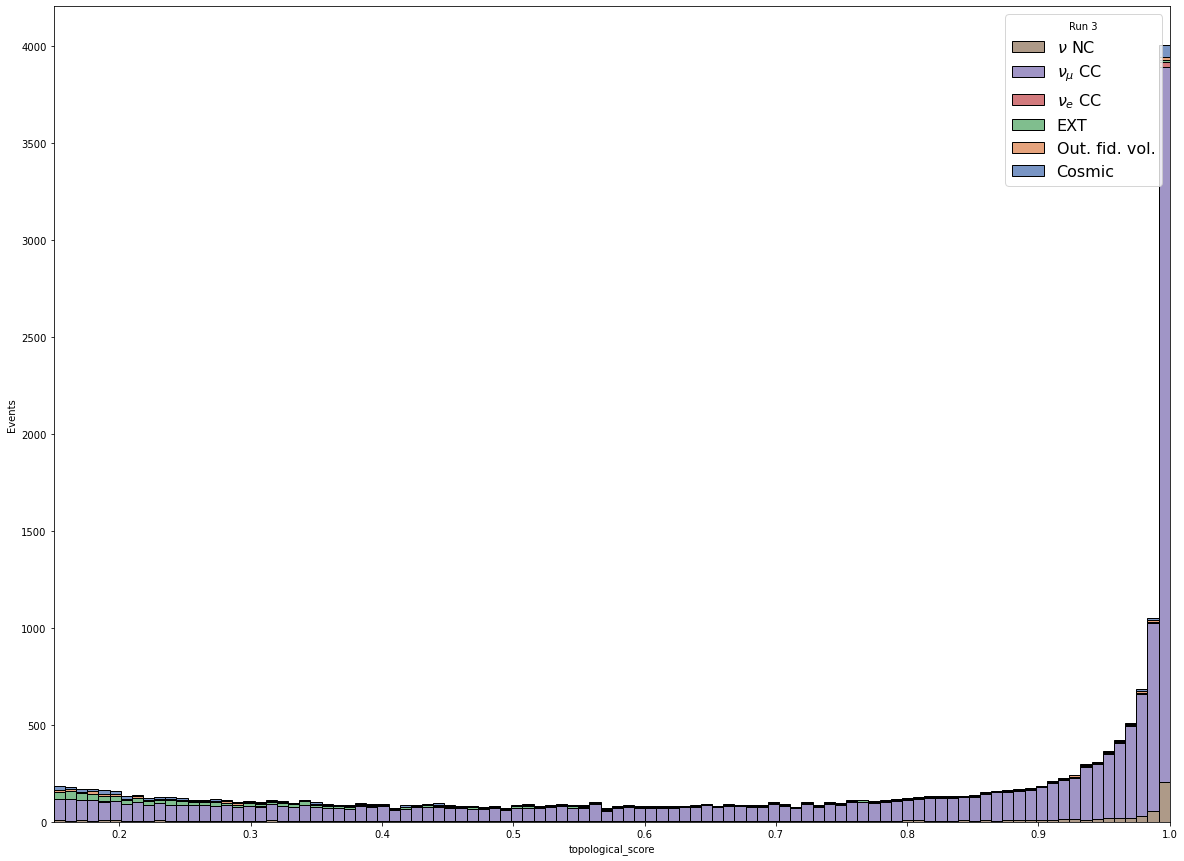

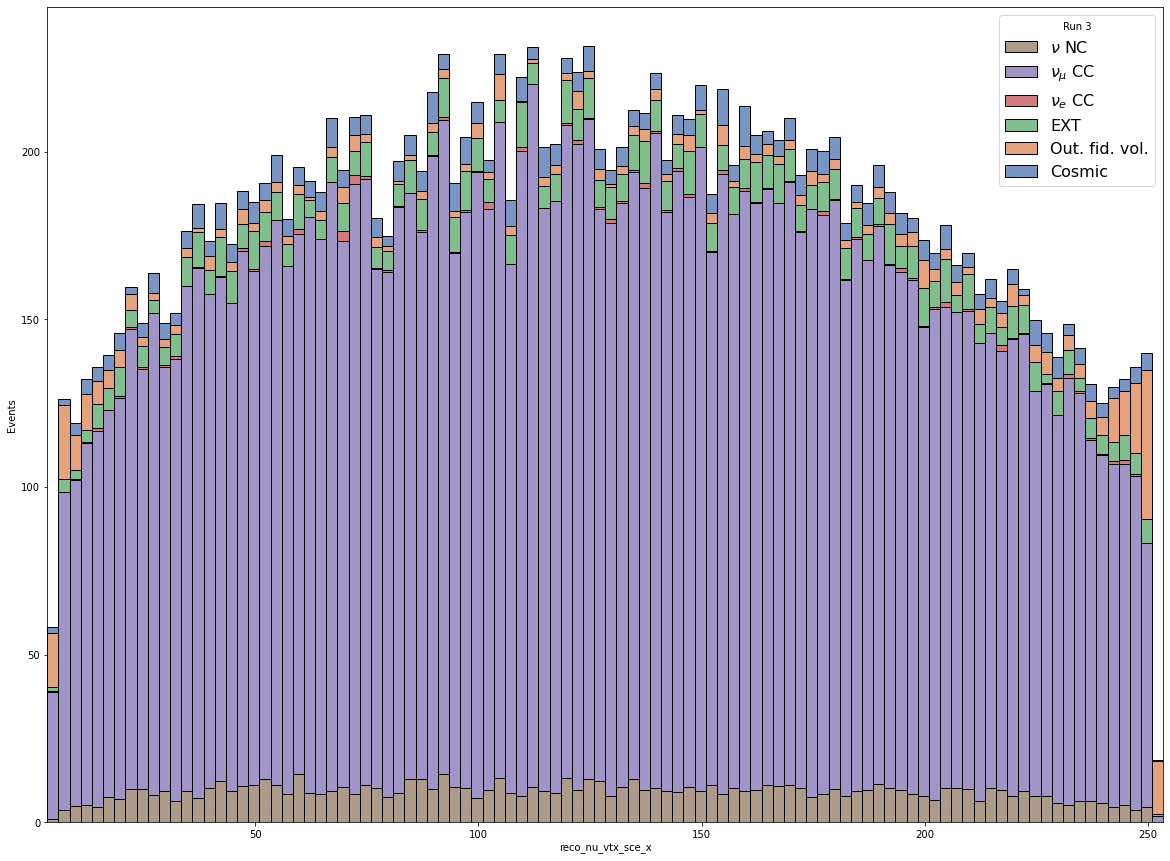

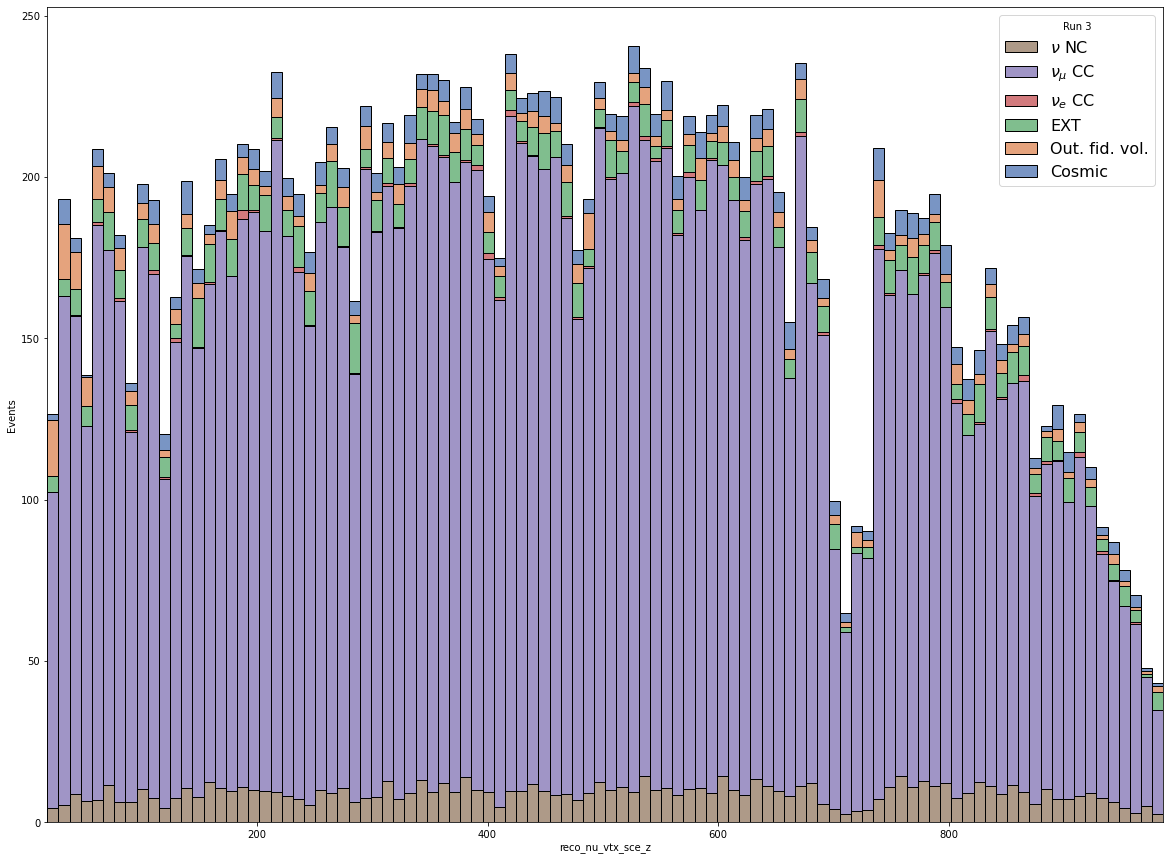

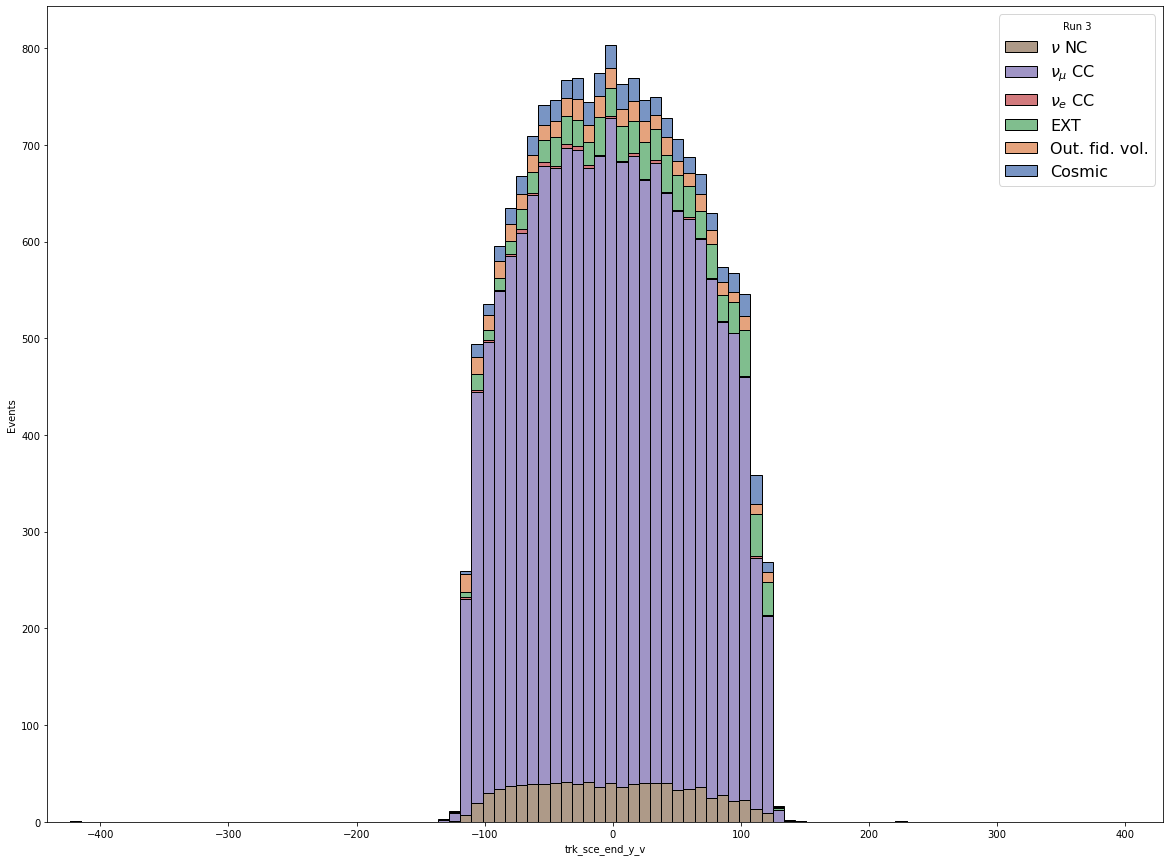

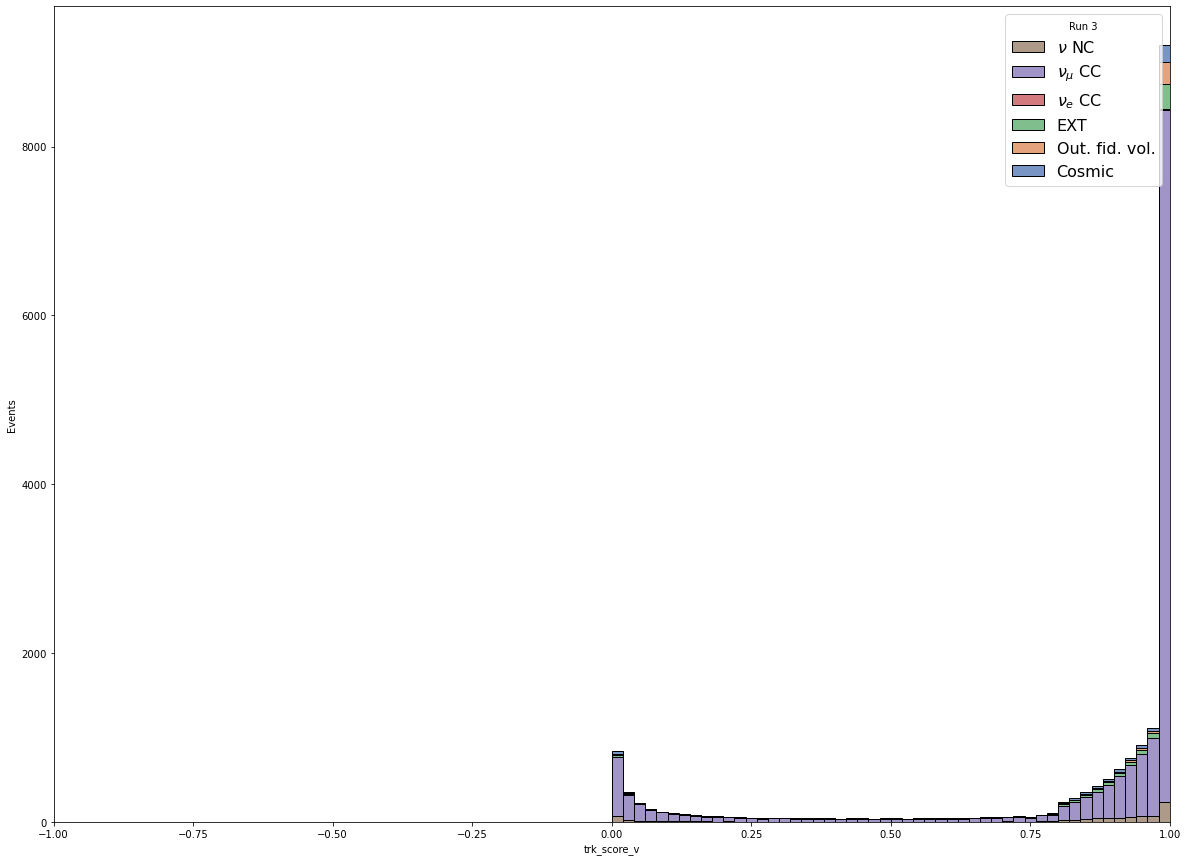

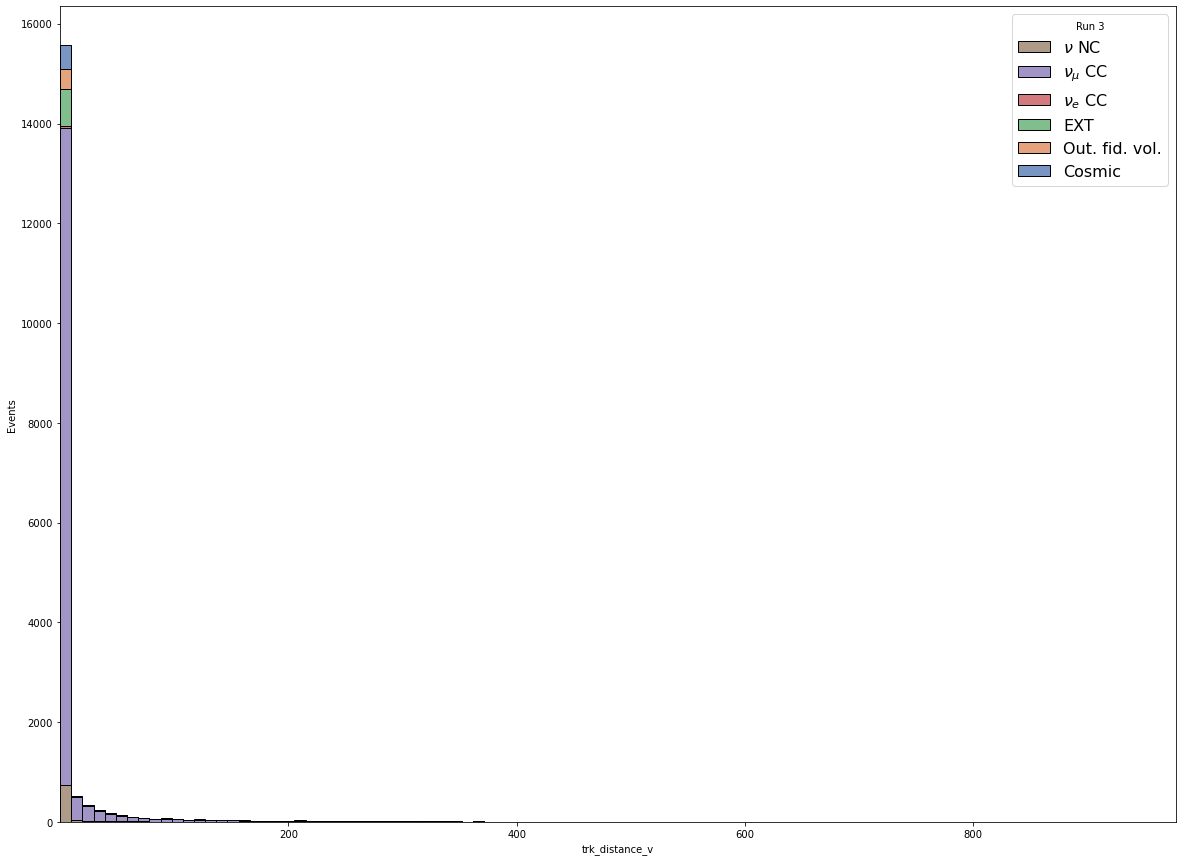

In [7]:
BIN = 100
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))

for item in all_variables_to_plot:
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=item, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=item, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
    plt.show(i)

# Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

### MOVE THE EFFICIENCY AND PURITY CALCULATIONS OUT OF THE CUTTING FUNCTION!
To do so would require the initial data to always be saved as a comparison. Which isn't a bad idea but is space inefficient (do it regardless).

In [8]:
# List of [signal entries , purity , label]. Can be appended each selection cut
#event = []
#event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])

# efficiency currently put inside the cutting function. MOVE IT OUT

# Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts 

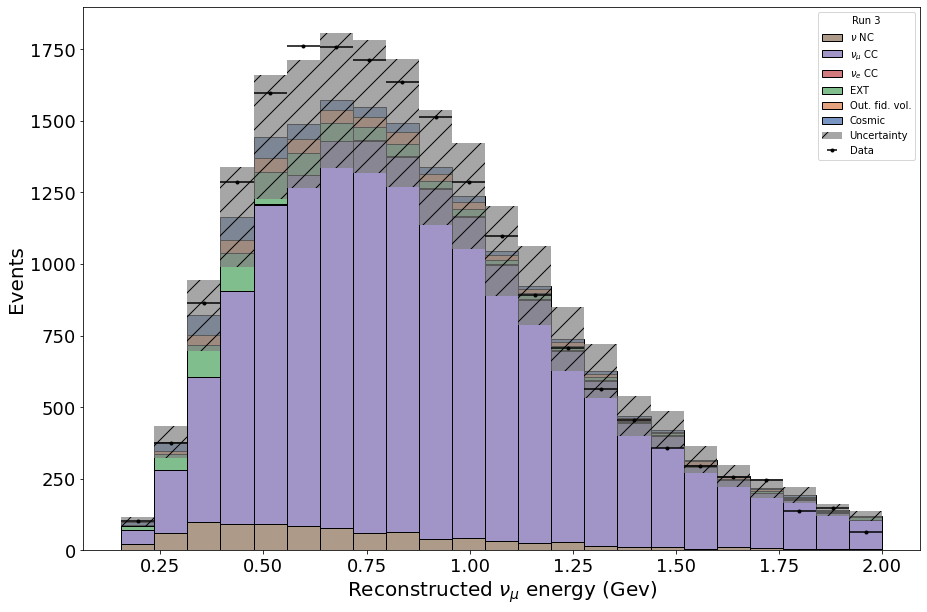

In [9]:
mc_dump, data_dump = Neutrino_functions.histogram_plot(MC_EXT, 'trk_energy_tot', 23, 'saved_figure_name', MC_EXT['weight'],xlims=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame)
# mc_dump and data_dump give you the heights of the histograms

In [10]:
#print(MC_EXT)
print(MC_EXT['category'].unique())
print(MC_EXT['category'].value_counts())

[21 31  4  5 10  7]
21    85213
31     5672
7      3103
4      3099
5      2512
10      343
Name: category, dtype: int64


*You want to look at section 4.5 for all of this. Also you're wanting to be careful with the binning here! Not discussed at all in lab book*

# Oscillation and fitting

### Define functions and minimise chi square 
Write oscillation function and chi square. Apply oscillation function on MC data set and minimize chi square

In [11]:
# now we can get the chi_squared uncertainty here
def chi_squared_pearson(MC, data):
    '''
    Takes arrays/lists of MC entries and data entries and finds the chi squared values for each component.
    MC:     Monte_Carlo entries (per bin)
    data:   Truth data entries (per bin)
    '''
    
    numer = np.square(MC - data)
    denom = MC
    
    div = np.divide(numer, denom)
    
    
    
    return np.sum(div)

In [12]:
def oscillation_func(sin2thetasq, mass, E):
    """
    Variables needed to get probability out:
        mixing angle as sin squared 2 theta
        mass splitting (mass) 
        Length travelled (L) ~ 0.47km
        Energy (E) taken from reconstructed v_mu energy GeV (list)
        Pulled from:
        https://warwick.ac.uk/fac/sci/physics/staff/academic/boyd/stuff/neutrinolectures/lec_oscillations.pdf
        Page 3
    """
    
    L = 0.5 #km
    ### mass, is it squared already? I assume so
    
    # dividing one value by array of energies
    inside = 1.27 * mass * np.divide(L,E)
    sin_val = np.square(np.sin(inside))
    
    return (sin2thetasq * sin_val)

In [13]:
# So, minimise using best fit functions
def fit_func(data, theta, mass):
    entries, energies = data
    return entries * (1-oscillation_func(theta, mass, energies))


In [14]:
# need to collect correct bin energies
def energy_vals(MC, bins):
    """
    :MC: Monte Carlo data (pass in trk_energy_tot, category and weight)
    :bins: number of bins
    
    :bin_centers: centre of each bin across the range of energies, useful for "energy values" of each bin
    :bin_no: numpy array with list matching the MC data corresponding to which bin each data value would fall into
    
    """
        
    # if data has been cleaned, this will collect edge of bins
    bin_edges = np.linspace(np.min(MC['trk_energy_tot']), np.max(MC['trk_energy_tot']),bins+1,endpoint = True)
    
    # take bin centres
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # will leave digitise component for later
    
    return bin_centers

In [15]:
bin_centers = energy_vals(MC_EXT, 23)

In [16]:
popt, pcov = scipy.optimize.curve_fit(fit_func, (mc_dump, bin_centers), data_dump, bounds = ([0,0], [np.inf,np.inf]))
print(popt, pcov)

[5.17012379e-10 6.19792672e-10] [[0. 0.]
 [0. 0.]]


In [17]:
#print(1-oscillation_func(popt[0], popt[1], bin_centers))
print(mc_dump, data_dump)

[99.67281050542199, 378.3259827103387, 820.275367761503, 1162.6083384392496, 1443.451246673622, 1487.6347838653194, 1572.276848549668, 1548.2517546403571, 1491.420317996193, 1337.1081367279817, 1236.7926146628674, 1045.898476669383, 923.791644457942, 737.4780955794745, 626.153114505135, 468.3434021484146, 421.6488151448324, 315.6517750401001, 258.60812641744417, 216.70269515459768, 192.45473065712864, 139.11476529018276, 119.87744242051394] [102, 373, 863, 1285, 1597, 1762, 1757, 1711, 1634, 1513, 1287, 1099, 891, 707, 565, 456, 356, 296, 257, 247, 139, 147, 65]


In [18]:
# lets just try scaling all the data rather than just muon neutrinos. also makes the code easier
def chi_squared_mapping(MC_heights, data_heights, theta_list, mass_list, bin_centers):
    A = len(theta_list)
    B = len(mass_list)
    
    chi_square_map = np.zeros((A, B))
    
    # create double look for theta_list and mass_list
    for i in range(A):
        for j in range(B):
            
            # calculate the probability of oscillation for the bin_centers
            p_vals = (1-oscillation_func(theta_list[i], mass_list[j], bin_centers))
            # apply these probability values to the heights of our MC data
            MC_heights_new = p_vals*MC_heights
            
            # check if MC_heights has zeroes in it
            if (0 in MC_heights_new):
                print("Zero detected in theta: {}, mass: {}".format(theta_list[j],mass_list[i]))
            ####print(theta_list[i], mass_list[j])
            
            # then save the chi_squared_values for the new MC_heights
            ### SEE, NOW I AND THEN J...WHY?
            chi_square_map[i,j] = chi_squared_pearson(MC_heights_new, data_heights)
            ###print("passed")
    return chi_square_map

In [53]:
# now lets try mapping the chi_square for two linspaces
increment = 100
theta_vals = np.linspace(0.00001, 0.5, num = increment) # note that I dont go to 1, because that breaks
mass_vals = np.linspace(0.0001, 100, num = increment)

In [54]:
chi_square_map = chi_squared_mapping(mc_dump, data_dump, theta_vals, mass_vals, bin_centers)

In [55]:
chi_square_div = np.divide(chi_square_map, 25)
print(chi_square_div)

[[  9.09261852   9.09334152   9.09332987 ...   9.09331379   9.09322769
    9.09279791]
 [  9.09261853   9.46628768   9.46508241 ...   9.45308491   9.41001783
    9.18897089]
 [  9.09261854   9.85493783   9.86200034 ...   9.83023117   9.74520818
    9.29635399]
 ...
 [  9.09261909 164.07095457 252.04554168 ... 179.38811371 191.67321911
  101.99274582]
 [  9.0926191  167.76882366 258.48838605 ... 183.58829017 196.46585846
  104.40452104]
 [  9.0926191  171.54103692 265.07998036 ... 187.87608556 201.36932418
  106.86692611]]


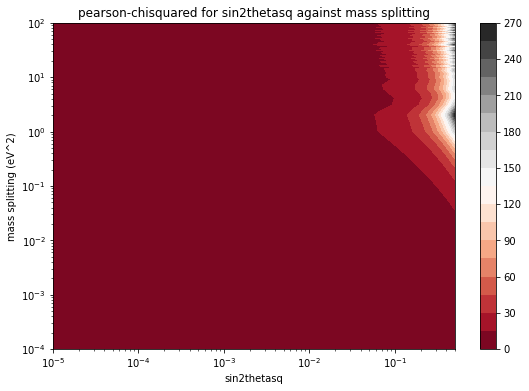

In [56]:
plt.figure(figsize = (9,6))
x_con, y_con = np.meshgrid(theta_vals, mass_vals, indexing = 'ij')
z_con = chi_square_div
cont = plt.contourf(x_con, y_con, z_con, 20, cmap='RdGy')
plt.colorbar(cont)
plt.title("pearson-chisquared for sin2thetasq against mass splitting")
plt.xlabel("sin2thetasq")
plt.ylabel("mass splitting (eV^2)")
plt.savefig("contour_map_new.png")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [24]:
# finding point of lowest chi squared on the plot, and the values at which it occurs
print(chi_square_div.shape)
print(np.where(chi_square_div==np.min(chi_square_div)))
print(chi_square_div[2][22])
# so plot this low point

zmin = np.min(chi_square_div)
mask = np.array(chi_square_div) == zmin
print(mask[2][22])
# So this should be the lowest value
print(theta_vals[2], mass_vals[22])


(1000, 1000)
(array([0]), array([0]))
9.279644888336135
False
0.003 2.2119819819819817


In [25]:
# use meshgrid to assure correct formatting
xx, yy = np.meshgrid(theta_vals, mass_vals, indexing='ij')

print(xx)
print(yy)

[[0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.002 0.002 0.002 ... 0.002 0.002 0.002]
 [0.003 0.003 0.003 ... 0.003 0.003 0.003]
 ...
 [0.998 0.998 0.998 ... 0.998 0.998 0.998]
 [0.999 0.999 0.999 ... 0.999 0.999 0.999]
 [1.    1.    1.    ... 1.    1.    1.   ]]
[[1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]
 [1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]
 [1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]
 ...
 [1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]
 [1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]
 [1.00000000e-02 1.10090090e-01 2.10180180e-01 ... 9.97998198e+01
  9.98999099e+01 1.00000000e+02]]


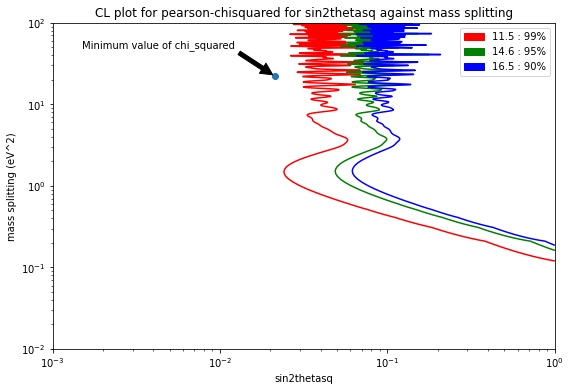

In [26]:
# trying aleksander mixing angle component
mixing_angle_red = [(1-np.sqrt(1-a))*(1-np.sqrt(1-0.36)) for a in theta_vals]
xr, yr = np.meshgrid(mixing_angle_red, mass_vals, indexing = 'ij')

# Go plot the CL things. Plot 90%, 95%, 99%
# 90% rDOF = 19.768, 95% rDOF = 17.708, 99% rDOF = 14.257
plt.figure(figsize = (9,6))
colors =  ['red', 'green', 'blue']
CS = plt.contour(xx, yy, chi_square_div, [11.52398, 14.61141, 16.48341], colors = colors)
#plt.clabel(CS, fontsize=9, inline=1)

# plot minimum point
plt.scatter(0.0212, 22.23)
plt.annotate('Minimum value of chi_squared', xy=(0.0212, 22.23), xytext=(0.0015,50),arrowprops=dict(facecolor='black', shrink=0.05))


plt.title("CL plot for pearson-chisquared for sin2thetasq against mass splitting")
plt.xlabel("sin2thetasq")
plt.ylabel("mass splitting (eV^2)")

plt.xscale('log')
plt.yscale('log')

# legend production
labels = ['99%', '95%', '90%']
#for i in range(len(labels)):
#    CS.collections[i].set_label(labels[i])
h = CS.collections
l = [f'{a:.1f}'for a in CS.levels]
l = [l[i] + (" : " + str(labels[i])) for i in range(len(CS.levels))]
proxy = [plt.Rectangle((0,0),1,1,color = colors[i]) for i in range(len(colors))]
plt.legend(proxy,l)
#plt.legend(loc='lower left')

plt.savefig("CL_map.png")
plt.show()

### 3+1 neutrino model exclusion figure

make new probability oscillation functions for the 3+1 model, apply them to get a result

In [58]:
#ue_theta_vals = 0.24*theta_vals
#cal1 = 1/(2*(1-0.24))*0.24
#cal2 = (1 - np.sqrt(1-theta_vals))
#ue_theta_vals = cal1*cal2
ue_theta_vals = [(1-np.sqrt(1-a))*(1-np.sqrt(1-0.24)) for a in theta_vals]
xxx, yyy = np.meshgrid(ue_theta_vals, mass_vals, indexing='ij')

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

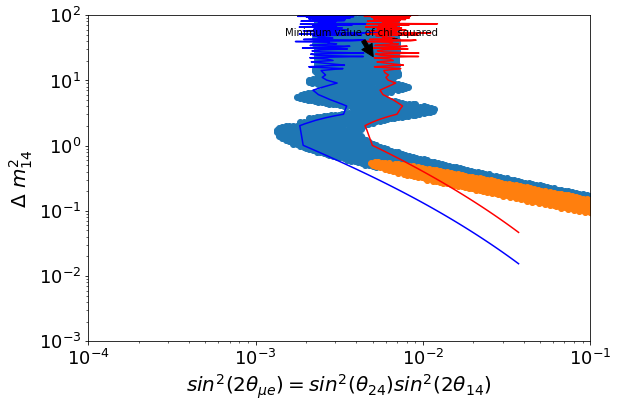

In [59]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()
plt.figure(figsize=(9,6))
# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# 0.24 multiple 
plt.annotate('Minimum value of chi_squared', xy=(0.0212*0.24, 22.23), xytext=(0.0015,50),arrowprops=dict(facecolor='black', shrink=0.05))

# 99% CL, 90% CL
colors =  ['blue', 'red']
CS = plt.contour(xxx, yyy, chi_square_div, [ 11.524, 16.473], colors = colors)

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([10**(-4), 0.1])
plt.ylim([10**(-3), 10**2])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
# check sigma values around the minimum value of chi squared?